# MADDPG For Collaboration and Competition

---

The goal of this project is to solve the [Collaboration and Competition](https://github.com/udacity/deep-reinforcement-learning/tree/master/p3_collab-compet) challenge from the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.



### 1. Required Libraries

The following libraries and dependencies are used:

1. [Python 3.6](https://www.python.org/downloads/)
2. [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md)
3. [NumPy](http://www.numpy.org/)
4. [Pytorch 1.3](https://pytorch.org/)

And the following files has been defined:

1. agent.py : Contains the implementation of Random, DDPG agents and MADDPG.
2. model.py : Contains the Actor and Critic models used by the DDPG agents.
3. noise.py : Contains the implementation of the Ornstein–Uhlenbeck noise.
3. coach.py : Contains a function to run the environment with a specified agent and define the structure to learn from the environment.


In [1]:
from unityagents import UnityEnvironment
import numpy as np

from agent import RandomAgent, DDPGAgent, MADDPG
from coach import Coach

import matplotlib.pyplot as plt

### 2.The Environment

The compiled environment can be downloaded from the following links:

- [Linux](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis_Linux.zip)
- [Mac OSX](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis.app.zip)
- [Windows (32-bit)](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis_Windows_x86.zip)
- [Windows (64-bit)](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P3/Tennis/Tennis_Windows_x86_64.zip)

Once downloaded, please update the environment location below:

In [2]:
environment_location = "env/Tennis.app"

In [3]:
env = UnityEnvironment(file_name=environment_location)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


#### Observation and Action Space

The environment consists of two agents (represented as rackets) that can be controlled to play a tennis-like game. Each agent receives a reward of +0.1 if it hits the ball while receives a penality of -0.01 when the ball hits the ground on its territory. To maximise the environment reward, both agent should try to keep the ball in play as long as possible.

Each agent observation is defined by 8 variables corresponding to the position and velocity of the ball and its racket. The ensemble of the two observations will be called "state" here since it has all the information required to re-create the current state.

Actions are continious and are defined by two variables, one to move toward/away from the net and one to jump.

The episode score is defined as the maximum score of the 2 agents. The environment is considered solved if this score reaches +0.5 over 100 consecutive episodes.

In [4]:
env_info = env.reset(train_mode=True)[brain_name]

n_agents = len(env_info.agents)
action_space = brain.vector_action_space_size
state = env_info.vector_observations

observation_space = state.shape[1]

print('Number of agents:', n_agents)
print('Each agent makes an observation of length: {}'.format(observation_space))
print('And can make an action of length: {}'.format(action_space))

Number of agents: 2
Each agent makes an observation of length: 24
And can make an action of length: 2


### 3. Settings and Parameters

The following settings and parameters have been used to train the MADDPG.

In [5]:
batch_size = 128                   # Batch size for training neural network
gamma = 0.99                       # Discount factor for future rewards
replay_buffer_size = int(1e6)      # Memory buffer size
actor_lr = 1e-4                    # Learning rate of the local actor 
critic_lr = 3e-4                   # Learning rate of the local critic
learn_every = 1                    # Number of steps before learning
n_updates = 3                      # Number of learning updates

tau = 7e-3                         # Hyperparameter for the soft-updates

action_range = [-1.,1.]            # Minimum and maximum values for the actions

eps_decay = 0.99                   # Decay of the Ornstein–Uhlenbeck Noise
min_eps = 0.001                    # Minimum noise multiplier after exploration

n_episodes = 5000                  # Number of episodes on which to train
max_steps = int(1e9)               # Maximum number of frames per episode
log_interval = 100                 # Number of episodes before a fixed log of results
save_interval = 100                # Number of episodes before saving model

save_directory = 'Checkpoint\\'    # Directory where models will be saved

### 4. Defining the Coach
The Coach will be responsible of running the agent and supervising its training.

In [6]:
coach = Coach(env=env,
              brain_name=brain_name,
              save_directory=save_directory
             )

We will run a random agent in the environment in order to better understand the environment

In [7]:
random_agent = RandomAgent(n_agents=n_agents,
                           action_space=action_space)

In [8]:
coach.watch(agent=random_agent, n_episodes=5)

Score (max over agents) from episode 0: 0.00
Score (max over agents) from episode 1: 0.00
Score (max over agents) from episode 2: 0.09
Score (max over agents) from episode 3: 0.00
Score (max over agents) from episode 4: 0.00


### 5. Create and train Multi Agent DDPG

In [9]:
m_agent = MADDPG(n_agents=n_agents,
                 observation_space=observation_space, 
                 action_space=action_space,
                 action_range=action_range,
                 replay_buffer_size=replay_buffer_size, 
                 batch_size=batch_size, 
                 gamma=gamma, 
                 tau=tau,
                 actor_lr=actor_lr, 
                 critic_lr=critic_lr,
                 eps_decay=eps_decay,
                 min_eps=min_eps,
                 learn_every=learn_every,
                 n_updates=n_updates,
                 seed=0)

In [10]:
scores, avg_scores = coach.train(agent=m_agent, 
                                 n_episodes=n_episodes, 
                                 max_steps=max_steps,
                                 log_interval=log_interval,
                                 save_interval=save_interval)

Episode:  100/5000 | Avg.Score: 0.002 | Epis.Score: 0.000 | Elaps.Time: 0h 05m 40s
Episode:  200/5000 | Avg.Score: 0.001 | Epis.Score: 0.000 | Elaps.Time: 0h 11m 40s
Episode:  300/5000 | Avg.Score: 0.022 | Epis.Score: 0.090 | Elaps.Time: 0h 19m 47s
Episode:  400/5000 | Avg.Score: 0.009 | Epis.Score: 0.000 | Elaps.Time: 0h 26m 31s
Episode:  500/5000 | Avg.Score: 0.034 | Epis.Score: 0.000 | Elaps.Time: 0h 35m 42s
Episode:  600/5000 | Avg.Score: 0.053 | Epis.Score: 0.100 | Elaps.Time: 0h 46m 47s
Episode:  700/5000 | Avg.Score: 0.064 | Epis.Score: 0.100 | Elaps.Time: 0h 57m 39s
Episode:  800/5000 | Avg.Score: 0.081 | Epis.Score: 0.000 | Elaps.Time: 1h 10m 59s
Episode:  900/5000 | Avg.Score: 0.077 | Epis.Score: 0.000 | Elaps.Time: 1h 24m 15s
Episode: 1000/5000 | Avg.Score: 0.076 | Epis.Score: 0.100 | Elaps.Time: 1h 37m 23s
Episode: 1100/5000 | Avg.Score: 0.100 | Epis.Score: 0.100 | Elaps.Time: 1h 53m 52s
Episode: 1200/5000 | Avg.Score: 0.118 | Epis.Score: 0.000 | Elaps.Time: 2h 15m 47s
Epis

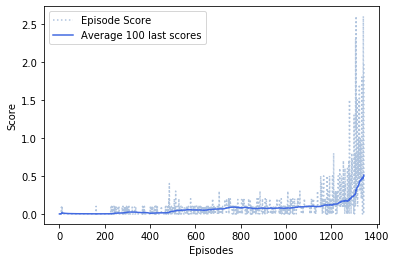

In [11]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(scores)), np.asarray(scores), c='lightsteelblue', linestyle=':', label='Episode Score')
ax.plot(np.arange(len(scores)), np.asarray(avg_scores), c='royalblue', label='Average 100 last scores')
ax.set(xlabel='Episodes', ylabel='Score')
ax.legend()
plt.show()

### 6. Watch the trained MADDPG

In [16]:
m_agent.load(save_directory,'MADDPG_Solved.pth')

In [17]:
coach.watch(m_agent,n_episodes=5)

Score (max over agents) from episode 0: 0.10
Score (max over agents) from episode 1: 1.00
Score (max over agents) from episode 2: 1.10
Score (max over agents) from episode 3: 0.80
Score (max over agents) from episode 4: 0.10


In [18]:
env.close()

### 7. Ideas for future work
<br>
1. We could do an hyperparameters tuning to train the agents in less epochs.
<br><br>
2. Some of the code for the learning part could be optimized to run faster.
<br><br>
3. Since each agent is the reflexion of the other, we could increase the replay memory by a factor of 2.
<br><br>
4. Since the reward is really sparse at the beginning, we could try different noise functions that would provide a better result at the begginning, but this might be environment specific...
<br><br>
5. The reward function could maybe be adjusted to give a bonus for how close the racket is from the ball. The model could then start to learn to go near the ball earlier without trial and error as the current implementation is doing.
<br><br>
6. We could adapt the code to train on the [soccer environment](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md).